# Supplementary Figure 6

In this notebook, we'll generate figure panels for use in Supplementary Figure 6, which shows the effect of removal of proteasomal genes on Hallmark Pathway enrichment in Bortezomib treatment conditions.

## Load packages

hise: The Human Immune System Explorer R SDK package  
purrr: Functional programming tools  
dplyr: Dataframe handling functions  
ggplot2: plotting functions  
cowplot: multi-panel plot assembly

In [1]:
quiet_library <- function(...) { suppressPackageStartupMessages(library(...)) }
quiet_library(hise)
quiet_library(purrr)
quiet_library(dplyr)
quiet_library(ggplot2)
quiet_library(cowplot)

In [2]:
out_dir <- "output/supp_figure_06"
if(!dir.exists(out_dir)) { dir.create(out_dir, recursive = TRUE) }

## Retrieve files

Now, we'll use the HISE SDK package to retrieve the analysis results for Hallmark Pathway enrichment both with and without PSM genes.

Standard Hallmark enrichment

In [3]:
hallmark_uuid <- list("4f05f2a0-59d2-4d04-b948-70d541613e71")

In [4]:
hallmark_fres <- cacheFiles(hallmark_uuid)
hallmark_file <- list.files(
    paste0("cache/",hallmark_uuid),
    recursive = TRUE, full.names = TRUE
)

submitting request as query ID first...

retrieving files using fileIDS...



Hallmark enrichment without PSM genes

In [5]:
no_psm_uuid <- list("0b5ce7b5-ac2e-4704-9ab4-6d7864b1bb26")
no_psm_fres <- cacheFiles(no_psm_uuid)
no_psm_file <- list.files(
    paste0("cache/",no_psm_uuid),
    recursive = TRUE, full.names = TRUE
)

submitting request as query ID first...

retrieving files using fileIDS...



## No-PSM Heatmap

We'll generate a heatmap of significant pathways that matches 

In [6]:
fdr_cutoff <- 0.05

In [7]:
hallmark_names <- read.csv("../common/gene_sets/hallmark_names.csv")

In [8]:
type_colors <- read.csv("../common/color_sets/aifi_cell_type_colors.csv")

Gradient colors

In [9]:
lo_gc <- data.frame(NES = seq(-3, -1.01, 0.01)) %>%
  mutate(nes_color = colorRampPalette(c("darkblue", "skyblue"))(n()))
mid_lo_gc <- data.frame(NES = seq(-1, 0, 0.01), nes_color = "gray80")
hi_gc <- data.frame(NES = seq(3,1.01,-0.01)) %>%
  mutate(nes_color = colorRampPalette(c("darkred", "coral"))(n()))
mid_hi_gc <- data.frame(NES = seq(1, 0.01, -0.01), nes_color = "gray80")

gc_df <- do.call(rbind, list(lo_gc, mid_lo_gc, mid_hi_gc, hi_gc))
gc_df$NES <- as.character(gc_df$NES)

In [10]:
no_psm_hallmark <- read.csv(no_psm_file)

In [11]:
head(no_psm_hallmark)

,fg,bg,timepoint,aifi_cell_type,pathway_label,NES,nomP,adjP,n_leadingEdge,n_pathway_genes,leadingEdge,pathway_genes
,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>,<chr>
1,bortezomib,dmso,24,t_cd4_cm,ROS Pathway,1.846204,0.002177422,0.01529758,38,58,TXNRD1;TXN;GSR;FTL;PRDX1;GCLM;SOD1;GCLC;PFKP;LAMTOR5;GLRX,ABCC1;ABCC1;ATOX1;CAT;CDKN2D;EGLN2;ERCC2;FES;FTL;G6PD;GCLC;GCLM;GLRX;GLRX2;GPX3;GPX4;GSR;HHEX;HMOX2;HMOX2;IPCEF1;JUNB;LAMTOR5;LSP1;LSP1;MBP;MGST1;MPO;MSRA;MSRA;NDUFA6;NDUFA6;NDUFA6;NDUFA6;NDUFA6;NDUFB4;NDUFS2;NQO1;OXSR1;PDLIM1;PFKP;PRDX1;PRDX2;PRDX4;PRDX6;PRNP;PTPA;SBNO2;SBNO2;SCAF4;SELENOS;SOD1;SOD2;SRXN1;STK25;TXN;TXNRD1;TXNRD2
2,bortezomib,dmso,24,t_cd4_cm,Adipogenesis,1.691519,0.001786125,0.01529758,120,210,UBC;TALDO1;NMT1;BAZ2A;SOD1;ACO2;RTN3;GBE1;MAP4K3;GPD2;RREB1;SQOR;YWHAG;PEX14;RIOK3,ABCA1;ABCB8;ACAA2;ACADL;ACADM;ACADS;ACLY;ACO2;ACOX1;ADCY6;ADIG;ADIPOQ;ADIPOR2;ADIPOR2;AGPAT3;AIFM1;AK2;ALDH2;ALDOA;ANGPT1;ANGPTL4;APLP2;APOE;ARAF;ARL4A;ATL2;ATP1B3;ATP5PO;BAZ2A;BCKDHA;BCL2L13;BCL6;C3;CAT;CAVIN1;CAVIN2;CCNG2;CD151;CD302;CD36;CDKN2C;CHCHD10;CHCHD10;CHCHD10;CHUK;CIDEA;CMBL;CMPK1;COL15A1;COL4A1;COQ3;COQ5;COQ9;COX6A1;COX7B;COX8A;CPT2;CRAT;CS;CYC1;CYP4B1;DBT;DDT;DDT;DECR1;DGAT1;DGAT1;DGAT1;DHCR7;DHRS7;DHRS7B;DLAT;DLD;DNAJB9;DNAJC15;DRAM2;ECH1;ECH1;ECHS1;ELMOD3;ELOVL6;ENPP2;EPHX2;ESRRA;ESYT1;ETFB;FABP4;FAH;FZD4;G3BP2;GADD45A;GBE1;GHITM;GPAM;GPAT4;GPD2;GPHN;GPX3;GPX4;GRPEL1;HADH;HIBCH;HSPB8;IDH1;IDH3A;IDH3G;IFNGR1;IMMT;ITGA7;ITIH5;ITSN1;JAGN1;LAMA4;LEP;LIFR;LIPE;LPCAT3;LPL;LTC4S;LTC4S;MAP4K3;MCCC1;MDH2;ME1;MGLL;MGST3;MIGA2;MRAP;MRPL15;MTARC2;MTCH2;MTCH2;MYLK;NABP1;NDUFA5;NDUFAB1;NDUFB7;NDUFS3;NDUFS3;NKIRAS1;NMT1;OMD;ORM1;PDCD4;PEMT;PEX14;PFKFB3;PFKL;PGM1;PHLDB1;PHYH;PIM3;PLIN2;POR;PPARG;PPM1B;PPP1R15B;PRDX3;PREB;PTCD3;PTGER3;QDPR;RAB34;REEP5;REEP6;RETN;RETSAT;RIOK3;RMDN3;RNF11;RREB1;RTN3;SAMM50;SCARB1;SCP2;SDHB;SDHC;SLC19A1;SLC1A5;SLC25A1;SLC25A10;SLC27A1;SLC5A6;SLC66A3;SNCG;SOD1;SORBS1;SOWAHC;SPARCL1;SQOR;SSPN;STAT5A;STOM;SUCLG1;SULT1A1;TALDO1;TANK;TKT;TOB1;TST;UBC;UBQLN1;UCK1;UCP2;UQCR10;UQCR11;UQCRC1;UQCRQ;VEGFB;YWHAG
3,bortezomib,dmso,24,t_cd4_cm,Fatty Acid Metabolism,1.502258,0.029819061,0.12740872,93,165,HSP90AA1;GABARAPL1;ACADVL;HSPH1;XIST;HSD17B4;ACO2;GPD2;HMGCS1;GRHPR;ADIPOR2,AADAT;ACAA1;ACAA2;ACADL;ACADM;ACADS;ACADVL;ACAT2;ACO2;ACOT2;ACOT8;ACOX1;ACSL1;ACSL4;ACSL5;ACSM3;ACSS1;ADH1C;ADH7;ADIPOR2;ADIPOR2;ADSL;ALAD;ALDH1A1;ALDH3A1;ALDH3A2;ALDH9A1;ALDOA;AOC3;APEX1;AQP7;AUH;BCKDHB;BLVRA;BMPR1B;BPHL;CA2;CA4;CA6;CBR1;CBR3;CD1D;CD36;CEL;CIDEA;CPOX;CPT1A;CPT2;CRAT;CRYZ;CYP1A1;CYP4A11;CYP4A22;D2HGDH;DECR1;DHCR24;DLD;DLST;ECH1;ECH1;ECHS1;ECI1;ECI2;EHHADH;ELOVL5;ENO2;ENO3;EPHX1;ERP29;ETFDH;FABP1;FABP2;FASN;FH;FMO1;G0S2;GABARAPL1;GAD2;GAPDHS;GCDH;GLUL;GPD1;GPD2;GRHPR;GSTZ1;H2AZ1;HADH;HADHB;HAO2;HCCS;HIBCH;HMGCL;HMGCS1;HMGCS2;HPGD;HSD17B10;HSD17B11;HSD17B4;HSD17B7;HSDL2;HSP90AA1;HSPH1;IDH1;IDH3B;IDH3G;IDI1;IL4I1;INMT;KMT5A;LDHA;LDHA;LGALS1;LTC4S;LTC4S;MAOA;MCEE;MDH1;MDH2;ME1;METAP1;MGLL;MIF;MIF;MIX23;MLYCD;NBN;NCAPH2;NSDHL;NTHL1;ODC1;OSTC;PCBD1;PDHA1;PDHB;PPARA;PRDX6;PSME1;PSME1;PTPRG;PTS;RAP1GDS1;RDH11;RDH16;REEP6;RETSAT;S100A10;SDHA;SDHC;SDHD;SERINC1;SLC22A5;SMS;SUCLA2;SUCLG1;SUCLG2;TDO2;TDO2;TP53INP2;UBE2L6;UGDH;UROD;UROS;VNN1;XIST;YWHAH
4,bortezomib,dmso,24,t_cd4_cm,Xenobiotic Metabolism,1.498978,0.046920821,0.15751990,72,224,GABARAPL1;NMT1;GSR;PTGES3;ACO2;PGD;GCLC;BLVRB;ATP2A2;SAR1B;HACL1,ABCC2;ABCC3;ABCD2;ABHD6;ACO2;ACOX1;ACOX2;ACOX3;ACP1;ACP2;ACSM1;ADH1C;ADH5;ADH7;AHCY;AKR1C2;AKR1C3;ALAS1;ALDH2;ALDH3A1;ALDH9A1;ANGPTL3;AOX1;AP4B1;APOE;AQP9;ARG1;ARG2;ARPP19;ASL;ATOH8;ATP2A2;BCAR1;BCAR1;BCAT1;BLVRB;BPHL;CA2;CASP6;CAT;CBR1;CCL25;CD36;CDA;CDO1;CES1;CES1;CFB;CFB;CFB;CFB;CFB;CFB;CFB;CNDP2;COMT;CROT;CRP;CSAD;CYB5A;CYFIP2;CYP17A1;CYP1A1;CYP1A2;CYP26A1;CYP27A1;CYP2C18;CYP2E1;CYP2J2;CYP2S1;CYP4F2;DCXR;DDAH2;DDAH2;DDAH2;DDAH2;DDAH2;DDAH2;DDAH2;DDC;DDT;DDT;DHPS;DHRS1;DHRS1;DHRS7;ECH1;ECH1;ELOVL5;ENPEP;ENTPD5;EPHA2;EPHX1;ESR1;ETFDH;ETS2;F10;F11;FABP1;FAH;FAS;FBLN1;FBP1;FETUB;FMO1;FMO3;G6PC1;GABARAPL1;GAD1;GART;GART;GCH1;

Add treat_time, display labels for pathways, and cell type 

In [12]:
plot_hallmark <- no_psm_hallmark %>%
  mutate(label_time = ifelse(timepoint == 4, "04", as.character(timepoint))) %>%
  mutate(treat_time = paste0(fg, "_", label_time)) %>%
  left_join(hallmark_names) %>%
  left_join(type_colors)

Joining with `by = join_by(pathway_label)`
Joining with `by = join_by(aifi_cell_type)`


In [13]:
top_n <- 20

sig_data <- plot_hallmark %>%
  filter(adjP < fdr_cutoff) %>%
  group_by(pathway) %>%
  arrange(adjP) %>%
  slice(1) %>%
  ungroup() %>%
  arrange(adjP) %>%
  head(top_n)

plot_data <- plot_hallmark %>%
  filter(pathway %in% sig_data$pathway)

xpos_df <- plot_data %>%
  select(cell_type_label, cell_type_xpos) %>%
  unique() %>%
  arrange(cell_type_xpos) %>%
  mutate(xpos = 1:n())

ypos_df <- plot_data %>%
  select(pathway_label) %>%
  unique() %>%
  arrange(pathway_label) %>%
  mutate(ypos = n():1)

timepoint_df <- data.frame(
    timepoint = c(4, 24, 72),
    timepoint_label = factor(c("Bortezomib, 4 Hours", "Bortezomib, 24 Hours", "Bortezomib, 72 Hours"), 
                             levels = c("Bortezomib, 4 Hours", "Bortezomib, 24 Hours", "Bortezomib, 72 Hours"))
)

plot_data <- plot_data %>%
  left_join(xpos_df) %>%
  left_join(ypos_df) %>%
  mutate(NES = as.character(round(NES, 2))) %>%
  left_join(gc_df) %>%
  left_join(timepoint_df)

Joining with `by = join_by(cell_type_label, cell_type_xpos)`
Joining with `by = join_by(pathway_label)`
Joining with `by = join_by(NES)`
Joining with `by = join_by(timepoint)`


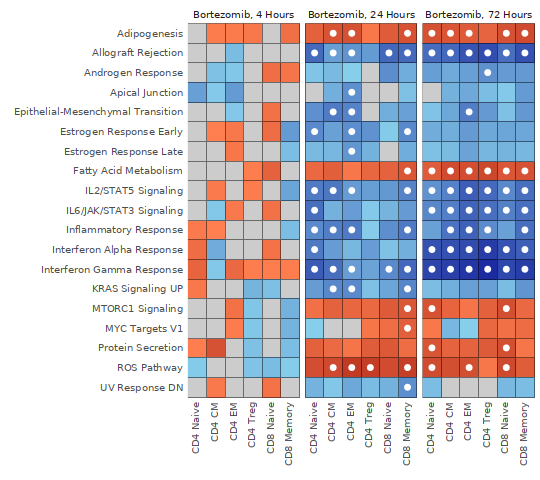

In [14]:
options(repr.plot.width = 4.5, repr.plot.height = 4)
hallmark_plot <- ggplot() +
  geom_tile(
      data = plot_data,
      aes(x = xpos,
          y = ypos,
          fill = nes_color),
      color = "black") +
  geom_point(
      data = plot_data %>% filter(adjP < fdr_cutoff),
      aes(x = xpos,
          y = ypos),
      color = "white",
      size = 0.9) +
  scale_fill_identity() +
  scale_x_continuous(
      "",
      breaks = xpos_df$xpos,
      labels = xpos_df$cell_type_label,
      expand = c(0, 0)) +
  scale_y_continuous(
      "",
      breaks = ypos_df$ypos,
      labels = ypos_df$pathway_label,
      expand = c(0, 0)) +
  facet_wrap(~ timepoint_label) +
  theme_bw(base_size = 7) +
  theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.3),
        panel.border = element_blank(),
        axis.ticks = element_blank(),
        strip.background = element_blank(),
        panel.grid = element_blank(),
        panel.background = element_rect(fill = "gray30"))
hallmark_plot

In [15]:
heatmap_file <- file.path(
    out_dir,
    paste0("bortezomib_no-PSM_hallmark_heatmap_",Sys.Date(),".pdf")
)
ggsave(heatmap_file,
       hallmark_plot,
       width = 4.5, height = 4)

## Difference heatmap

In addition to an updated heatmap, it's also helpful to see the changes that occurred between the two result sets - with and without Proteasomal genes.

In [16]:
all_hallmark <- read.csv(hallmark_file)

In [17]:
names(all_hallmark)

[1] "fg"              "bg"              "timepoint"       "aifi_cell_type" 
 [5] "pathway_label"   "NES"             "nomP"            "adjP"           
 [9] "n_leadingEdge"   "n_pathway_genes" "leadingEdge"     "pathway_genes"

In [18]:
all_hallmark <- all_hallmark %>%
  filter(fg == "bortezomib") %>%
  select(-leadingEdge, -pathway_genes) %>%
  select(fg, timepoint, aifi_cell_type, pathway_label, adjP, NES) %>%
  rename(all_padj = adjP,
         all_NES = NES)

In [19]:
no_psm_hallmark <- no_psm_hallmark %>%
  select(-leadingEdge, -pathway_genes) %>%
  select(fg, timepoint, aifi_cell_type, pathway_label, adjP, NES) %>%
  rename(no_psm_padj = adjP,
         no_psm_NES = NES)

In [20]:
joint_gsea <- all_hallmark %>%
  left_join(no_psm_hallmark) %>%
  left_join(type_colors) %>%
  left_join(hallmark_names) %>%
  mutate(diff = no_psm_NES - all_NES,
         abs_diff = abs(diff)) %>%
  mutate(all_sig = all_padj < 0.1,
         no_psm_sig = no_psm_padj < 0.1) %>%
  mutate(sig_change = all_sig != no_psm_sig) %>%
  filter(timepoint != 4)

Joining with `by = join_by(fg, timepoint, aifi_cell_type, pathway_label)`
Joining with `by = join_by(aifi_cell_type)`
Joining with `by = join_by(pathway_label)`


In [21]:
change_data <- file.path(
    out_dir,
    paste0("bortezomib_no-PSM_hallmark_difference_data_",Sys.Date(),".csv")
)
write.csv(
    joint_gsea,
    change_data,
    quote = FALSE,
    row.names = FALSE
)

In [22]:
sig_change_gsea <- joint_gsea %>%
  filter(sig_change)

In [23]:
pathway_label_order <- rev(sort(unique(joint_gsea$pathway_label)))

joint_gsea$pathway_label <- factor(joint_gsea$pathway_label, levels = pathway_label_order)

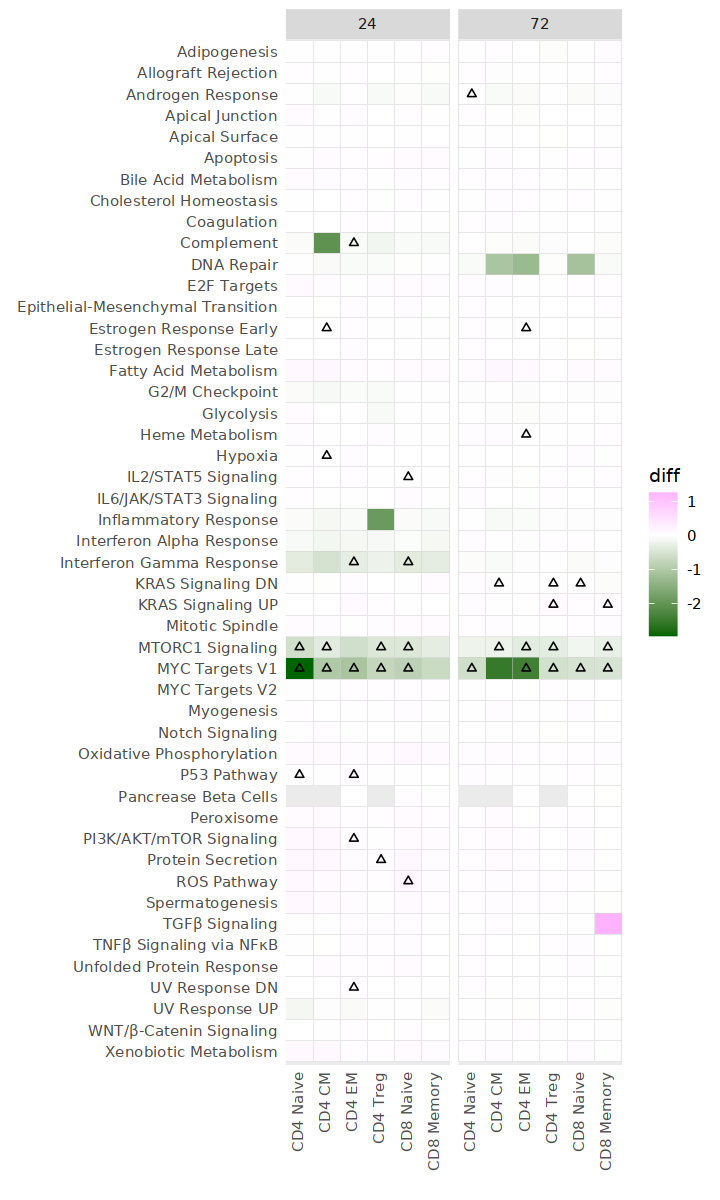

In [29]:
options(repr.plot.width = 6, repr.plot.height = 10)
change_plot <- ggplot() +
  geom_tile(
      data = joint_gsea,
      aes(x = cell_type_xpos,
          y = pathway_label,
          fill = diff),
      color = "gray80"
  ) +
  geom_point(
      data = sig_change_gsea,
      aes(x = cell_type_xpos,
          y = pathway_label),
      pch = 2
  ) +
  scale_fill_gradient2(
      low = "darkgreen",
      mid = "white",
      high = "magenta",
      midpoint = 0
  ) +
  scale_x_continuous(
      "",
      breaks = type_colors$cell_type_xpos,
      labels = type_colors$cell_type_label,
      expand = c(0,0)
  ) +
  scale_y_discrete("") +
  facet_wrap(
      ~timepoint,
      ncol = 2
  ) +
  theme(panel.grid = element_blank(),
        axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.3),
        axis.ticks = element_blank())
change_plot

In [30]:
change_file <- file.path(
    out_dir,
    paste0("bortezomib_no-PSM_hallmark_differences_",Sys.Date(),".pdf")
)
suppressWarnings(
    ggsave(change_file,
           change_plot,
           width = 6, height = 10)
)

# Store results in HISE

Finally, we store the output file in our Collaboration Space for later retrieval and use. We need to provide the UUID for our Collaboration Space (aka `studySpaceId`), as well as a title for this step in our analysis process.

The hise function `uploadFiles()` also requires the FileIDs from the original fileset for reference.

In [27]:
study_space_uuid <- "40df6403-29f0-4b45-ab7d-f46d420c422e"
title <- paste("VRd TEA-seq Supp Fig 6", Sys.Date())

In [28]:
out_list <- as.list(c(heatmap_file, change_data, change_file))

In [29]:
out_list

[[1]]
[1] "output/supp_figure_6/bortezomib_no-PSM_hallmark_heatmap_2023-10-30.pdf"

[[2]]
[1] "output/supp_figure_6/bortezomib_no-PSM_hallmark_difference_data_2023-10-30.csv"

[[3]]
[1] "output/supp_figure_6/bortezomib_no-PSM_hallmark_differences_2023-10-30.pdf"

In [30]:
in_list <- c(hallmark_uuid, no_psm_uuid)

In [31]:
uploadFiles(
    files = out_list,
    studySpaceId = study_space_uuid,
    title = title,
    inputFileIds = in_list,
    store = "project",
    doPrompt = FALSE
)

[1] "Cannot determine the current notebook."
[1] "1) /home/jupyter/repro-vrd-tea-seq/figures/Supp-Fig-06_bor_no-PSM.ipynb"
[1] "2) /home/jupyter/repro-vrd-tea-seq/figures/Supp-Fig-03_labeling-umaps.ipynb"
[1] "3) /home/jupyter/repro-vrd-tea-seq/figures/Supp-Fig-03_wnn-umaps.ipynb"


Please select (1-3)  1


$files
$files[[1]]
[1] "output/supp_figure_6/bortezomib_no-PSM_hallmark_heatmap_2023-10-30.pdf"

$files[[2]]
[1] "output/supp_figure_6/bortezomib_no-PSM_hallmark_difference_data_2023-10-30.csv"

$files[[3]]
[1] "output/supp_figure_6/bortezomib_no-PSM_hallmark_differences_2023-10-30.pdf"


$traceId
[1] "a69bd228-d1ab-4373-beeb-4edf604de615"

In [32]:
sessionInfo()

R version 4.3.1 (2023-06-16)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 20.04.6 LTS

Matrix products: default
BLAS/LAPACK: /opt/conda/lib/libopenblasp-r0.3.24.so;  LAPACK version 3.11.0

locale:
 [1] LC_CTYPE=C.UTF-8       LC_NUMERIC=C           LC_TIME=C.UTF-8       
 [4] LC_COLLATE=C.UTF-8     LC_MONETARY=C.UTF-8    LC_MESSAGES=C.UTF-8   
 [7] LC_PAPER=C.UTF-8       LC_NAME=C              LC_ADDRESS=C          
[10] LC_TELEPHONE=C         LC_MEASUREMENT=C.UTF-8 LC_IDENTIFICATION=C   

time zone: Etc/UTC
tzcode source: system (glibc)

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] cowplot_1.1.1 ggplot2_3.4.3 dplyr_1.1.3   purrr_1.0.2   hise_2.16.0  

loaded via a namespace (and not attached):
 [1] gtable_0.3.4      jsonlite_1.8.7    compiler_4.3.1    crayon_1.5.2     
 [5] tidyselect_1.2.0  IRdisplay_1.1     bitops_1.0-7      assertthat_0.2.1 
 [9] textshaping_0.3.6 systemfonts_1.0.4 